In [ ]:
import numpy as np
import scipy as sc
import cmath
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from PIL import Image

In [ ]:
def generate_sine_wave(sample_rate, duration):
    t = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    # 2pi для преобразования в радианы
    x = 1/(0.25 * np.sqrt(2 * np.pi))*np.exp(-(t-4)**2/(2*0.25)**2) + 1/(0.5*np.sqrt(2*np.pi))*np.exp(-(t-6)**2/(2*0.5)**2)
    return t, x

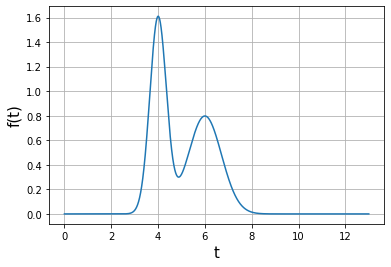

In [ ]:
t, x = generate_sine_wave(4410, 13)

fig, ax = plt.subplots()

#plt.title("функция для генерирования экспериментальных данных")
ax.plot(t, x)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('t', fontsize=15)
ax.set_ylabel('f(t)', fontsize=15)

plt.show()

In [ ]:
N = 4410 * 13
xf = np.abs(np.fft.fft(x)**2)

In [ ]:
saving_error_function = []
saving_results = []

In [ ]:
def iterative_loop(xf, N, iterations, error=0, show_image=0):
  error_function = np.array([])

  amplitudes = np.sqrt(xf)
  phase = (2*np.random.rand(N) - 1) * np.pi
  field_detector_start = amplitudes * np.exp(1j * phase)

  
  object_start = np.fft.ifft(field_detector_start)
  gk = object_start

  # iterative loop
  for i in range(iterations):

    field_detector = np.fft.fft(gk)
    field_detector_updated = amplitudes * np.exp(1j * np.angle(field_detector))
    gk_updated = np.real(np.fft.ifft(field_detector_updated))
    gk1 = np.zeros(N)
  
    # object containts 
    for i in range(N):
      if 2.5 <= t[i] <= 8.5:
        gk1[i] = gk_updated[i]
      else:
        gk1[i] = 0

    gk = gk1

    #error calculating
    if error == 1:
      error = 0
      for i in range (N):
        error = error + np.power(amplitudes[i] - np.abs(field_detector[i]), 2)
      error = error / N
      np.append(error_function, error)

   #saving error_function
  global saving_error_function
  saving_error_function.append(error_function)

   #getting final image
  if show_image != 0:
    fig, ax = plt.subplots()
    ax.plot(t, gk)
    ax.grid()
    
    #  Добавляем подписи к осям:
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('f(t)', fontsize=15)

    plt.show()

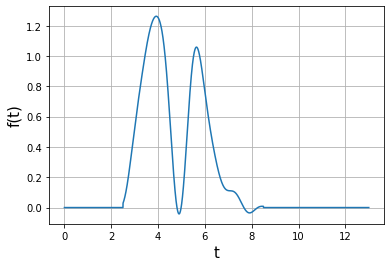

In [ ]:
iterative_loop(xf, N, 300, show_image=1)

In [ ]:
def iterative_loop1(xf, N, phase_amount, iterations, error=0, show_image=0):
  error_function = np.array([])
  known_phase = np.angle(np.fft.fftshift(np.fft.fft(x)))

  amplitudes = np.fft.fftshift(np.sqrt(xf))
  phase = (2*np.random.rand(N) - 1) * np.pi
  field_detector_start = amplitudes * np.exp(1j * phase)

  
  object_start = np.fft.ifft(np.fft.ifftshift(field_detector_start))
  gk = object_start

  # iterative loop
  for i in range(iterations):
    field_detector = np.fft.fftshift(np.fft.fft(gk))
    field_detector_updated = amplitudes * np.exp(1j * np.angle(field_detector))
    
    #giving some phase
    if phase_amount != N:
      for i in range(N//3, N//3 + phase_amount):
        field_detector_updated[i] = amplitudes[i] * np.exp(1j * known_phase[i])
    
    gk_updated = np.real(np.fft.ifft(np.fft.ifftshift(field_detector_updated)))
    gk1 = np.zeros(N)

    # object containts
    for i in range(N):
      if 2.5 <= t[i] <= 8.5:
        gk1[i] = gk_updated[i]
      else:
        gk1[i] = 0

    gk = gk1

    #error calculating
    if error == 1:
      error = 0
      for i in range (N):
        error = error + np.power(amplitudes[i] - np.abs(field_detector[i]), 2)
      error = error / N
      np.append(error_function, error)

   #saving error_function
  global saving_error_function
  saving_error_function.append(error_function)
   
   #getting final image
  if show_image != 0:
    plt.plot(t, gk)
    plt.show()

In [ ]:
a = [N, 30, 15, 5]
k = 0
for j in range(1, 5):
  for i in range(1): iterative_loop1(xf, N, N//a[k], 1)
  np.savez('saving_' + str(j), saving_error_function)
  saving_error_function = list()
  k += 1

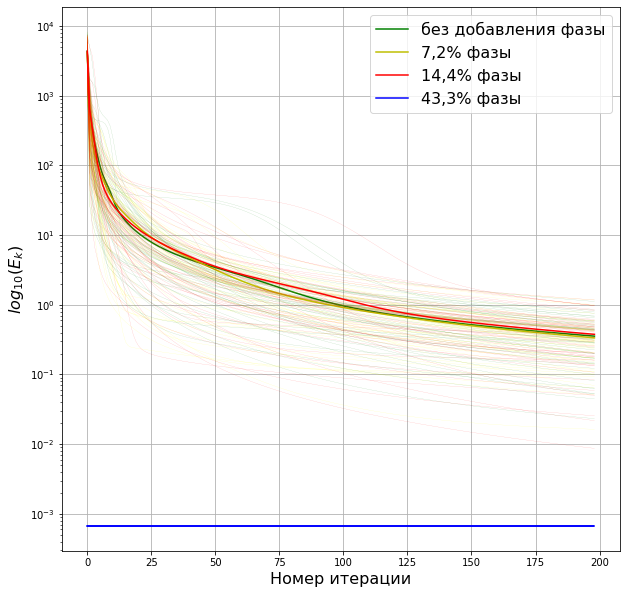

In [ ]:
 #без фазы
npzfile = np.load('saving_1.npz')
no_phase = npzfile['arr_0']
no_phase_average = np.zeros(200)
for i in range(50):
    for j in range(200):
        no_phase_average[j] += no_phase[i][j]
no_phase_average /= 50
no_phase_T = np.transpose(no_phase)


 #с фазой одна тридцатая
npzfile2 = np.load('saving_2.npz')
phase_little = npzfile2['arr_0']
phase_little_average = np.zeros(200)
for i in range(50):
    for j in range(200):
        phase_little_average[j] += phase_little[i][j]
phase_little_average /= 50
phase_little_T = np.transpose(phase_little)

 #с фазой одна пятнадцатая
npzfile3 = np.load('saving_3.npz')
phase_more = npzfile3['arr_0']
phase_more_average = np.zeros(200)
for i in range(50):
    for j in range(200):
        phase_more_average[j] += phase_more[i][j]
phase_more_average /= 50
phase_more_T = np.transpose(phase_more)


 #c фазой одна пятая
npzfile4 = np.load('saving_4.npz')
phase_big = npzfile4['arr_0']
phase_big_average = np.zeros(200)
for i in range(50):
    for j in range(200):
        phase_big_average[j] += phase_big[i][j]
phase_big_average /= 50
phase_big_T = np.transpose(phase_big)


fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(no_phase_T[1:], 'green', alpha=0.35, linewidth=0.2, markersize=3)
ax.plot(no_phase_average[1:], color='g', label='без добавления фазы')

ax.plot(phase_little_T[1:], 'yellow', alpha=0.35, linewidth=0.2, markersize=3)
ax.plot(phase_little_average[1:], color='y', label='7,2% фазы')

ax.plot(phase_more_T[1:], 'red', alpha=0.35, linewidth=0.2, markersize=3)
ax.plot(phase_more_average[1:], color='r', label='14,4% фазы')

ax.plot(phase_big_T[1:], 'blue', alpha=0.35, linewidth=0.2, markersize=3)
ax.plot(phase_big_average[1:], color='b', label='43,3% фазы')
ax.grid()

plt.xlabel(r'Номер итерации', fontsize=16)
plt.ylabel(r'$log_{10}(E_k)$', fontsize=16)
ax.legend(fontsize=16)
ax.semilogy()
plt.show()

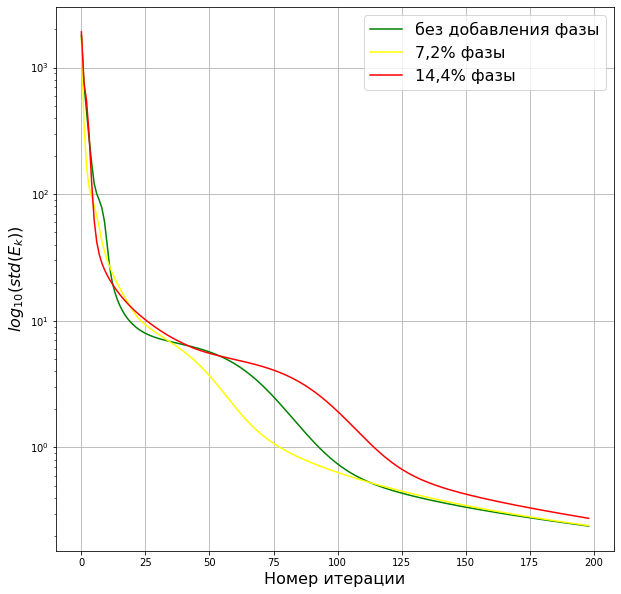

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.std(no_phase_T[1:], axis=1), 'green', label='без добавления фазы')
ax.plot(np.std(phase_little_T[1:], axis=1), 'yellow', label='7,2% фазы')
ax.plot(np.std(phase_more_T[1:], axis=1), 'red', label='14,4% фазы')

plt.xlabel(r'Номер итерации', fontsize=16)
plt.ylabel(r'$log_{10}(std(E_k))$', fontsize=16)

ax.legend(fontsize=16)
ax.grid()
ax.semilogy()
plt.show()